# Lab_04 - Uczenie maszynowe: klasyfikacja

## Zadanie 1

In [68]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [69]:
# Wczytanie danych
df = pd.read_csv("data/iris.csv", sep=",")
print(df)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [70]:
# wszystkie wiersze, kolumna nr 0
print(df.values[:, 0])
# wiersze od 5 do 10, wszystkie kolumny
print(df.values[5:11, :])
# dane w komórce [1,4]
print(df.values[1, 4])

[5.1 4.9 4.7 4.6 5.0 5.4 4.6 5.0 4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.0 5.0 5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.0
 5.5 4.9 4.4 5.1 5.0 4.5 4.4 5.0 5.1 4.8 5.1 4.6 5.3 5.0 7.0 6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.0 5.9 6.0 6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.0 5.7 5.5 5.5 5.8 6.0 5.4 6.0 6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.0 5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.0 6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.0 6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]
[[5.4 3.9 1.7 0.4 'Setosa']
 [4.6 3.4 1.4 0.3 'Setosa']
 [5.0 3.4 1.5 0.2 'Setosa']
 [4.4 2.9 1.4 0.2 'Setosa']
 [4.9 3.1 1.5 0.1 'Setosa']
 [5.4 3.7 1.5 0.2 'Setosa']]
Setosa


In [71]:
# podzial na zbior testowy (30%) i treningowy (70%), ziarno losowosci = 13
(train_set, test_set) = train_test_split(df.values, train_size=0.7, random_state=13)

print(test_set)
print(test_set.shape[0])

train_inputs = train_set[:, 0:4]
train_classes = train_set[:, 4]
test_inputs = test_set[:, 0:4]
test_classes = test_set[:, 4]

[[5.7 2.8 4.5 1.3 'Versicolor']
 [5.6 2.9 3.6 1.3 'Versicolor']
 [5.1 3.7 1.5 0.4 'Setosa']
 [5.8 2.7 5.1 1.9 'Virginica']
 [6.8 3.0 5.5 2.1 'Virginica']
 [5.5 4.2 1.4 0.2 'Setosa']
 [7.7 3.0 6.1 2.3 'Virginica']
 [6.3 2.7 4.9 1.8 'Virginica']
 [5.1 3.8 1.6 0.2 'Setosa']
 [5.5 2.6 4.4 1.2 'Versicolor']
 [6.0 3.0 4.8 1.8 'Virginica']
 [6.3 2.8 5.1 1.5 'Virginica']
 [6.3 2.3 4.4 1.3 'Versicolor']
 [5.1 3.8 1.9 0.4 'Setosa']
 [5.8 2.8 5.1 2.4 'Virginica']
 [4.8 3.1 1.6 0.2 'Setosa']
 [6.1 3.0 4.9 1.8 'Virginica']
 [6.5 3.0 5.8 2.2 'Virginica']
 [6.1 3.0 4.6 1.4 'Versicolor']
 [4.4 2.9 1.4 0.2 'Setosa']
 [6.0 2.9 4.5 1.5 'Versicolor']
 [5.7 4.4 1.5 0.4 'Setosa']
 [5.1 3.5 1.4 0.3 'Setosa']
 [7.4 2.8 6.1 1.9 'Virginica']
 [5.4 3.0 4.5 1.5 'Versicolor']
 [6.7 3.3 5.7 2.5 'Virginica']
 [5.8 4.0 1.2 0.2 'Setosa']
 [7.7 2.6 6.9 2.3 'Virginica']
 [6.1 2.9 4.7 1.4 'Versicolor']
 [6.4 2.8 5.6 2.2 'Virginica']
 [6.4 3.1 5.5 1.8 'Virginica']
 [5.2 4.1 1.5 0.1 'Setosa']
 [5.4 3.4 1.5 0.4 'Setosa']
 [

## Zadanie 2

In [72]:
(train_set, test_set) = train_test_split(df.values, train_size=0.7, random_state=295952)

In [73]:
def classify_iris(sl, sw, pl, pw):
    if sl > 4:
        return "Setosa"
    elif pl <= 5:
        return "Virginica"
    else:
        return "Versicolor"

In [74]:
good_predictions = 0
len = test_set.shape[0]
for i in range(len):
    if (
        classify_iris(test_set[i, 0], test_set[i, 1], test_set[i, 2], test_set[i, 3])
        == test_set[i, 4]
    ):
        good_predictions = good_predictions + 1
        print(good_predictions)
        print(round(good_predictions / len * 100, 2), "%")

1
2.22 %
2
4.44 %
3
6.67 %
4
8.89 %
5
11.11 %
6
13.33 %
7
15.56 %
8
17.78 %
9
20.0 %
10
22.22 %
11
24.44 %
12
26.67 %
13
28.89 %
14
31.11 %
15
33.33 %


In [75]:
# sortowanie wg gatunku
train_set = test_set[np.argsort(test_set[:, 4])]
print(train_set)


# poprawiona funkcja klasyfikujaca
def classify_iris(sl, sw, pl, pw):
    if pw < 1.5:
        return "Setosa"
    elif pl >= 4.8:
        return "Virginica"
    else:
        return "Versicolor"

[[5.2 3.4 1.4 0.2 'Setosa']
 [5.3 3.7 1.5 0.2 'Setosa']
 [5.0 3.2 1.2 0.2 'Setosa']
 [5.0 3.5 1.6 0.6 'Setosa']
 [4.7 3.2 1.6 0.2 'Setosa']
 [4.6 3.2 1.4 0.2 'Setosa']
 [5.0 3.4 1.6 0.4 'Setosa']
 [5.7 3.8 1.7 0.3 'Setosa']
 [4.3 3.0 1.1 0.1 'Setosa']
 [4.4 2.9 1.4 0.2 'Setosa']
 [4.4 3.2 1.3 0.2 'Setosa']
 [4.6 3.6 1.0 0.2 'Setosa']
 [5.1 3.8 1.5 0.3 'Setosa']
 [5.0 3.3 1.4 0.2 'Setosa']
 [5.1 3.5 1.4 0.2 'Setosa']
 [5.6 3.0 4.5 1.5 'Versicolor']
 [6.7 3.0 5.0 1.7 'Versicolor']
 [6.4 3.2 4.5 1.5 'Versicolor']
 [6.3 3.3 4.7 1.6 'Versicolor']
 [5.5 2.6 4.4 1.2 'Versicolor']
 [6.3 2.5 4.9 1.5 'Versicolor']
 [6.5 2.8 4.6 1.5 'Versicolor']
 [6.3 2.3 4.4 1.3 'Versicolor']
 [5.0 2.3 3.3 1.0 'Versicolor']
 [6.2 2.9 4.3 1.3 'Versicolor']
 [5.6 2.5 3.9 1.1 'Versicolor']
 [6.3 2.8 5.1 1.5 'Virginica']
 [6.7 2.5 5.8 1.8 'Virginica']
 [7.4 2.8 6.1 1.9 'Virginica']
 [6.3 2.9 5.6 1.8 'Virginica']
 [7.6 3.0 6.6 2.1 'Virginica']
 [6.5 3.0 5.2 2.0 'Virginica']
 [5.8 2.7 5.1 1.9 'Virginica']
 [7.7 2.6 6

In [76]:
good_predictions = 0
len = test_set.shape[0]
for i in range(len):
    if (
        classify_iris(test_set[i, 0], test_set[i, 1], test_set[i, 2], test_set[i, 3])
        == test_set[i, 4]
    ):
        good_predictions = good_predictions + 1
        print(good_predictions)
        print(round(good_predictions / len * 100, 2), "%")

1
2.22 %
2
4.44 %
3
6.67 %
4
8.89 %
5
11.11 %
6
13.33 %
7
15.56 %
8
17.78 %
9
20.0 %
10
22.22 %
11
24.44 %
12
26.67 %
13
28.89 %
14
31.11 %
15
33.33 %
16
35.56 %
17
37.78 %
18
40.0 %
19
42.22 %
20
44.44 %
21
46.67 %
22
48.89 %
23
51.11 %
24
53.33 %
25
55.56 %
26
57.78 %
27
60.0 %
28
62.22 %
29
64.44 %
30
66.67 %
31
68.89 %
32
71.11 %
33
73.33 %
34
75.56 %
35
77.78 %
36
80.0 %
37
82.22 %


## Zadanie 3

In [77]:
# Podział datesetu iris na zbiór uczący i testowy w proporcji 70:30
train, test = train_test_split(df, train_size=0.7, random_state=3123)
print(train)
print(test)

     sepal.length  sepal.width  petal.length  petal.width     variety
76            6.8          2.8           4.8          1.4  Versicolor
143           6.8          3.2           5.9          2.3   Virginica
129           7.2          3.0           5.8          1.6   Virginica
21            5.1          3.7           1.5          0.4      Setosa
46            5.1          3.8           1.6          0.2      Setosa
..            ...          ...           ...          ...         ...
54            6.5          2.8           4.6          1.5  Versicolor
37            4.9          3.6           1.4          0.1      Setosa
4             5.0          3.6           1.4          0.2      Setosa
144           6.7          3.3           5.7          2.5   Virginica
65            6.7          3.1           4.4          1.4  Versicolor

[105 rows x 5 columns]
     sepal.length  sepal.width  petal.length  petal.width     variety
22            4.6          3.6           1.0          0.2      Set

In [78]:
# Podzial na inputy i klasy
train_inputs = train.values[:, 0:4]
train_classes = train.values[:, 4]
test_inputs = test.values[:, 0:4]
test_classes = test.values[:, 4]
print(train_inputs)
print(train_classes)
print(test_inputs)
print(test_classes)

[[6.8 2.8 4.8 1.4]
 [6.8 3.2 5.9 2.3]
 [7.2 3.0 5.8 1.6]
 [5.1 3.7 1.5 0.4]
 [5.1 3.8 1.6 0.2]
 [5.0 2.3 3.3 1.0]
 [7.3 2.9 6.3 1.8]
 [4.9 3.1 1.5 0.2]
 [4.7 3.2 1.6 0.2]
 [6.3 3.3 6.0 2.5]
 [4.4 3.2 1.3 0.2]
 [6.3 3.4 5.6 2.4]
 [5.8 2.7 3.9 1.2]
 [5.8 2.7 5.1 1.9]
 [4.3 3.0 1.1 0.1]
 [5.7 3.0 4.2 1.2]
 [4.8 3.0 1.4 0.1]
 [5.5 4.2 1.4 0.2]
 [5.7 3.8 1.7 0.3]
 [5.8 2.7 4.1 1.0]
 [6.7 3.1 4.7 1.5]
 [6.9 3.1 4.9 1.5]
 [4.8 3.1 1.6 0.2]
 [7.7 3.0 6.1 2.3]
 [5.2 4.1 1.5 0.1]
 [7.1 3.0 5.9 2.1]
 [5.5 2.3 4.0 1.3]
 [6.5 3.0 5.5 1.8]
 [5.9 3.0 5.1 1.8]
 [6.1 2.8 4.0 1.3]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [6.4 3.1 5.5 1.8]
 [7.4 2.8 6.1 1.9]
 [4.9 3.0 1.4 0.2]
 [6.0 2.9 4.5 1.5]
 [6.4 3.2 5.3 2.3]
 [6.7 3.3 5.7 2.1]
 [4.8 3.4 1.9 0.2]
 [5.6 2.7 4.2 1.3]
 [5.0 3.5 1.6 0.6]
 [5.8 2.8 5.1 2.4]
 [6.4 2.8 5.6 2.2]
 [5.1 3.5 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [6.1 2.9 4.7 1.4]
 [5.4 3.4 1.5 0.4]
 [4.6 3.1 1.5 0.2]
 [5.7 2.8 4.1 1.3]
 [5.1 2.5 3.0 1.1]
 [5.1 3.8 1.5 0.3]
 [5.6 2.9 3.6 1.3]
 [5.0 3.0 1.

In [79]:
# Inicjacja drzewa decyzyjnego
from sklearn import tree

clf = tree.DecisionTreeClassifier()

In [80]:
# Trenowanie drzewa decyzyjnego
clf = clf.fit(train_inputs, train_classes)

[Text(0.3333333333333333, 0.9, 'x[2] <= 2.45\ngini = 0.665\nsamples = 105\nvalue = [38, 33, 34]'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 1.55\ngini = 0.5\nsamples = 67\nvalue = [0, 33, 34]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.6666666666666666, 0.5, 'x[2] <= 4.85\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(0.5, 0.3, 'x[0] <= 5.4\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

/Users/sregucki/UG/IO/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sregucki/UG/IO/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sregucki/UG/IO/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sregucki/UG/IO/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: Mat

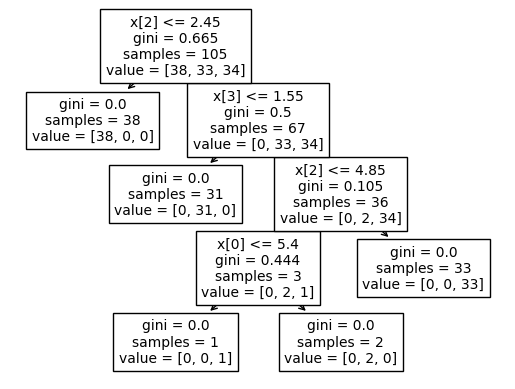

In [81]:
# Wyswietlenie drzewa decyzyjnego
tree.plot_tree(clf)

In [92]:
# Ewaluacja klasyfikatora
from sklearn.metrics import accuracy_score

y_pred = clf.predict(test_inputs)

# Dokladnosc klasyfikatora
print(f"Dokladnosc klasyfikatora: {accuracy_score(test_classes, y_pred) * 100}%")

Dokladnosc klasyfikatora: 84.44444444444444%


[[12  0  0]
 [ 0 15  2]
 [ 0  5 11]]


/Users/sregucki/UG/IO/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sregucki/UG/IO/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sregucki/UG/IO/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sregucki/UG/IO/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: Mat

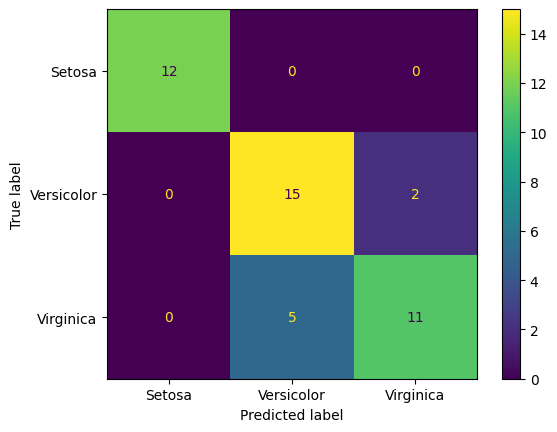

In [83]:
# Macierz błędów
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_classes, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

## Zadanie 4

K = 3: 98.0%
K = 5: 98.0%
K = 11: 93.0%
Naive Bayes: 91.0%


/Users/sregucki/UG/IO/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sregucki/UG/IO/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sregucki/UG/IO/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sregucki/UG/IO/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: Mat

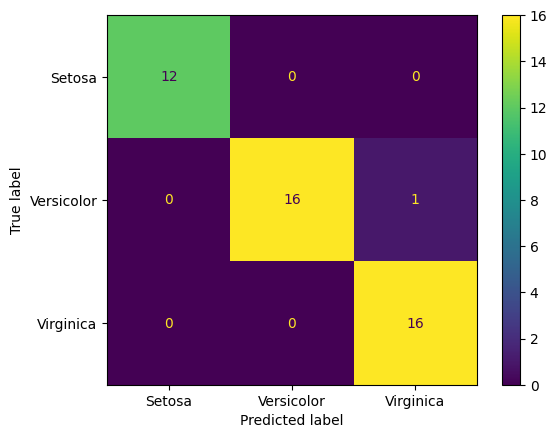

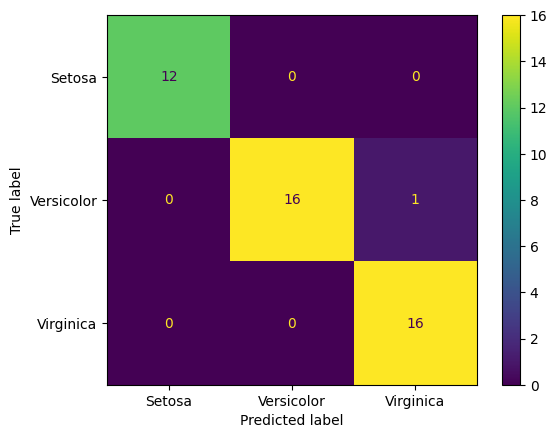

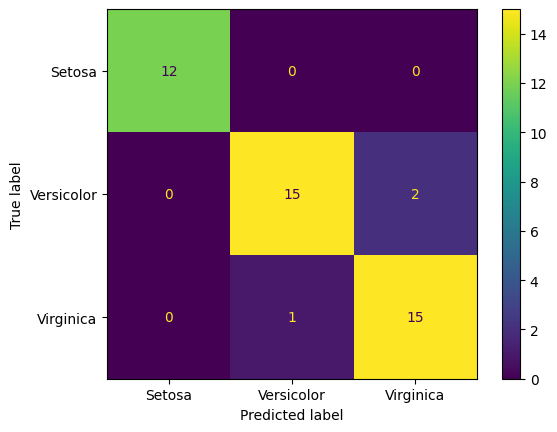

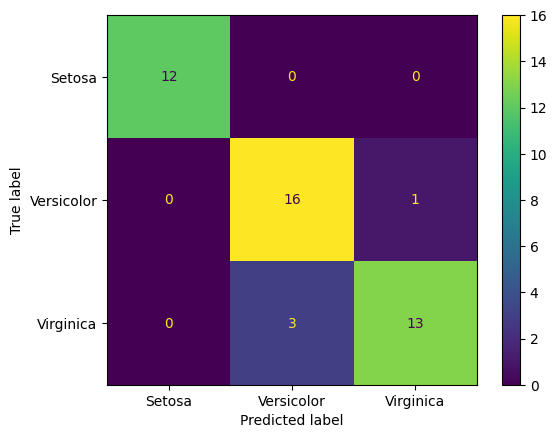

In [91]:
# K najblizszych sasiadow
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# dla k = 3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_inputs, train_classes)
y_pred = neigh.predict(test_inputs)
print(f"K = 3: {round(accuracy_score(test_classes, y_pred), 2) * 100}%")
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(test_classes, y_pred), display_labels=clf.classes_
).plot()

# dla k = 5
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train_inputs, train_classes)
y_pred = neigh.predict(test_inputs)
print(f"K = 5: {round(accuracy_score(test_classes, y_pred), 2) * 100}%")
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(test_classes, y_pred), display_labels=clf.classes_
).plot()

# dla k = 11
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(train_inputs, train_classes)
y_pred = neigh.predict(test_inputs)
print(f"K = 11: {round(accuracy_score(test_classes, y_pred), 2) * 100}%")
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(test_classes, y_pred), display_labels=clf.classes_
).plot()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_inputs, train_classes)
y_pred = gnb.predict(test_inputs)
print(f"Naive Bayes: {round(accuracy_score(test_classes, y_pred), 2) * 100}%")
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(test_classes, y_pred), display_labels=clf.classes_
).plot()